# Business Understanding
The project is designed to help host find characters of the most popular lodging and the factors affecting the price range. Five business interest questions will guide readers to learn about the competitive level of Seattle lodging.

### Question 1: When and where does travelers want to go

### Question 2: What does other host have for their lodging

### Question 3: What features affect lodging price the most?

# Data Understanding

### Gather data from csv files
There are three files provided from resouces: calender, listings and reviews

In [1]:
#import necessary libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

#import data from csv files
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

## A look of the data
In Calendar file, there are 3181 lodging with records from 2016-01-04 to 2017-01-03

price would be NaN if available is f

### Calendar file

In [2]:
#Read the scale of the file to understand task weight
calendar.shape

(1393570, 4)

In [3]:
#With over 1.4 million lines, the code below is to have brief look of the type of data
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
#check the number of date and test whether all date have same amount of listings
calendar.groupby('date').count()['listing_id'].value_counts()

3818    365
Name: listing_id, dtype: int64

Calendar file is a date matters file recorded the listing data through out a year (365 days), from 2016-01-04 to 2017-01-02. Each date has listing status of 3818 lodgings, which means there are no missing listing. 

### Listings file

In [5]:
#Read the scale of the file to understand task weight
listings.shape

(3818, 92)

In [6]:
#Brief look of the type of data
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
#Check the data type of the dataset, briefly understand the number of numerical vs categorical variables
listings.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [8]:
#Check the name of non_numerical data, and have idea about which columns needs to be convert before analysis
listings.select_dtypes('object').columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [9]:
#As there are columns such as price, rate need to be cleaning to numeric
#take brief look of columns that are already numerical and find the variable that might have business interest
listings.select_dtypes(['float64','int64']).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

There are 62 object variables and 30 numeric variables. 

The columns we are interested in are variables related to price and views. But the price-related variables are object type, meaning the data needs to be converted. 

At the same time, there are variables related to id and URL which should not be considered when doing analysis. 

In [10]:
#Set the columns which are interested in the analysis
col_price = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
col_review = list(listings.columns[listings.columns.str.startswith('review')])

In [11]:
#Briefly check the staus of numerical variable and number of NaN values in each columns
listings[col_price + col_review].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


Among 3818 lodging, most of them has missing value in review

### Reviews file
This is the review data where comments are stored as sentence, needs text mining for furthur analysis

In [12]:
#Read the scale of the file to understand task weight
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [13]:
#The date of review are before the date of obtain booking data
reviews.shape

(84849, 6)

In [ ]:
# One review can be bias, I want to see whether all lodgings only have 1 review
# find the listing that has more than 1 reviews
multi_review = reviews.groupby('listing_id').filter(lambda x: x['comments'].count() > 1)
multi_review

In [15]:
# Among 3818 accomedations, might not all of them have review. 
# The code below are to check the number of lodgings have reviews and the portion have more than 1 review
listing_count = len(set(reviews.listing_id))
listing_multi_review_count = len(set(multi_review.listing_id))
print('There are', listing_count, 'different lodging in the dataset,', 
     listing_multi_review_count, 'of them have more than 1 reviews')

There are 3191 different lodging in the dataset, 2880 of them have more than 1 reviews


In [16]:
#From head brief look, we know the date of review are before the collection date of calendar file
#I want to see the distribution of reviews time
reviews.date.sort_values()

34876    2009-06-07
34877    2009-06-28
12622    2009-07-17
15249    2009-08-31
15250    2009-09-10
            ...    
53165    2016-01-03
43186    2016-01-03
49870    2016-01-03
25909    2016-01-03
24145    2016-01-03
Name: date, Length: 84849, dtype: object

The reviews file gather comments from 2009-06-07 to 2016-01-03, before calendar file timeframe. 

# Data preparation

### Functions predefined
Function that used for data cleaning

In [17]:
def to_season(month: int):
    '''
    Convert month to season by [winter, spring, summer, fall] -> [0,1,2,3]
    
    input: 
            month: month in number format
    output: 
            season as in number, with (0, 1, 2, 3) as in (winter, spring, summer, fall)
    
    '''
    if month in [12,1,2]:
        return 0
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    else: 
        return 3

In [18]:
def divide_date_columns(dataframe, column_name, seperator = '-', date_sequence: list = ['year', 'month', 'day'], drop_org = False):
    '''
    Covert date columns to seperate columns with given seperator and sequence
    eg. orginal format as 1999-12-31 as [year, month, day] with seperator '-'
        
    input:    
            seperator: the charactor that seperate day, month, year in the original column
            date_sequence: a list with the order of year, month, day of original column
            drop_org: True/False, decide whether to drop the original columns
    output: 
            dataframe: new dataframe which is processed based on given parameters
    '''
    
    #test the whether column name is a list, if not, convert to list. 
    try:
        column_name = column_name.split()
    except: 
        pass
    
    #convert data with given column names
    for col in column_name: 
        for i, form in enumerate(date_sequence): 
            dataframe[col+'_'+form] = dataframe[col].apply(lambda date: date.split(seperator)[i])
        dataframe[col+'_season'] = dataframe[col+'_'+'month'].apply(lambda month: to_season(int(month)))
        if drop_org:
            dataframe.drop(col)
    return dataframe

In [19]:
def convert_price(dataframe, column_name):
    '''
    convert price column to numeric value
    
    input: 
            dataframe: the dataframe that need to convert price columns to numeric value
            column_name: the name of price columns, can be list or a name of string
    output: 
            dataframe: new dataframe with target column converted
    '''
    
    #test the whether column name is a list, if not, convert to list. 
    try:
        column_name = column_name.split()
    except: 
        pass
        
    #convert data with given column names
    for col in column_name:
        dataframe[col] = dataframe[col].str.replace('[\$,]', '', regex=True).astype('float64')
    
    return dataframe

### Data Cleaning

* Special characters are removed to convert columns to numeric variables, the number is converted to float type, and NaN values in the `weekly_price` and `monthly_price` columns are replaced with calculated values based on daily price, and others are understood as no price for additional value thus 0
* NaN value in Review column can have special meaning about lodgings, in listing file, there are 627 lodging has no review in all review column. Thus I decided to leave the NaN value for analysis
* Drop the column that has more than **75%** NaN value as they are useless for the analysis
* rate variable can evaluate the service level, thus it is useful and need to convert to numeric variable by remove % sign and divided by 100
* Most of the categorical variable are remain unprocess. I dropped attributes with only one value and convert binary vairable such as 'host_is_superhost' and 'is_location_exact' to 0 and 1 for analysis purpose
* Convert date columns into three different columns (year, month, day). One of the objects is to see which season/month is the most popular month for travelers to visit Seattle, separate the date could simply the process of analysis. The process is simplify with defined function `divide_date_columns`
* In listings file, there is one instance with incorrect zip code format, as there are partial zip code within it, replace it to correct format

In [20]:
#Convert price column in listings and calendar
#Calendar file
calendar = convert_price(calendar, 'price')

#Lising file
#fill missing value in weekly_price and monthly_price by multiple 7 or 30 depends on columns
listings = convert_price(listings, col_price)
listings['weekly_price'] = listings.weekly_price.fillna(listings.price*7)
listings['monthly_price'] = listings.monthly_price.fillna(listings.price*30)
for col in col_price: 
    listings[col] = listings[col].fillna(0)

In [21]:
#Drop the column has over 80% NaN value
listings = listings.drop(listings.columns[listings.isna().mean() > 0.75], axis = 1)

In [22]:
#Observe NaN in review columns
print('There are', listings[listings[col_review].isna().all(axis = 1)].shape[0], 'row has no review rate.')
listings[col_review].isna().mean()
#The NaN value takes no more than 18% in each review column, thus the output column can still be used

There are 627 row has no review rate.


review_scores_rating           0.169460
review_scores_accuracy         0.172342
review_scores_cleanliness      0.171032
review_scores_checkin          0.172342
review_scores_communication    0.170508
review_scores_location         0.171556
review_scores_value            0.171818
reviews_per_month              0.164222
dtype: float64

In [23]:
#Grab the column that is rate and convert them to numeric by removing % sign and divided 100
col_rate = listings.columns[listings.columns.str.endswith('rate')]
for col in col_rate:
    listings[col] = listings[col].fillna(listings[col].mode()[0]).str.replace('%', '').astype('float64').apply(lambda row: row / 100)

In [24]:
#Clean categorical variable
#make a list of object variable
col_obj = listings.select_dtypes('object').columns.tolist()

#get rid of the column with only one category
for col in col_obj:
    if len(pd.unique(listings[col].str.lower())) == 1:
        listings = listings.drop(col, axis = 1)
        col_obj.remove(col)

In [25]:
#Clean categorical variable
#replace binary column with f, t to 0, 1
col_binary = [] # the variable recorded which attributes are binary

#Calendar file: replace available variable to 0 / 1
calendar['available'] = calendar['available'].apply(lambda x:1 if x=='t' else 0) 
calendar
for col in col_obj: #listings file
    if 'f' in pd.unique(listings[col].str.lower()):
        col_binary.append(col)
        listings[col] = listings[col].apply(lambda x:1 if x=='t' else 0).fillna(listings[col].mode()[0])

In [26]:
#View the attributes that is binary
col_binary

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [27]:
#seperate date column to three column as in year, month and day in calendar file
calendar = divide_date_columns(calendar, 'date')

In [28]:
#There is one distance with incorrect zip code format
listings['zipcode'] = listings['zipcode'].replace('99\n98122', '98122') #modify content

# Evaluate the Results

### Question 1: When and where does travelers want to go
Using the available rate, we can see the percentage of day that lodgingis not booked by traverler. The available rate will be calculted as percentage of available lodging and date within each zip code area and month.
* Use line chart to present the trend of available rate through out the year
* With map chart to present the difference in available rate and review rate for different location

#### Popularity by month

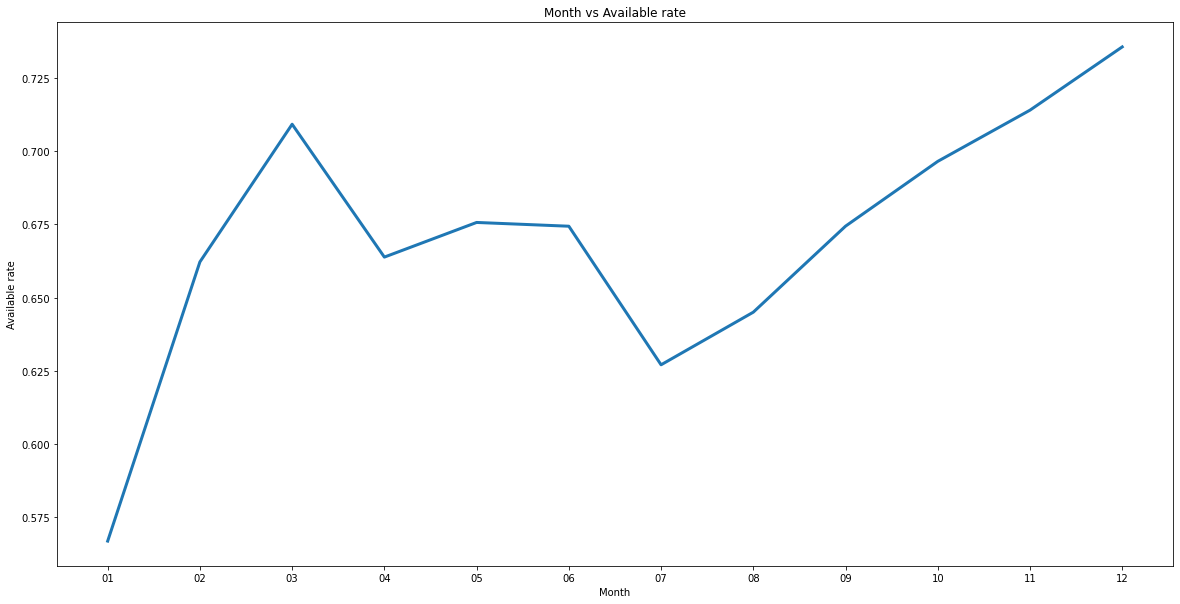

In [29]:
#Find the available rate by months
calendar_available_permonth = calendar.groupby('date_month').mean()['available']

#Visualization
plt.figure(figsize=(20, 10))
x = calendar_available_permonth.index
y = calendar_available_permonth.values
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month', )
plt.ylabel('Available rate')
plt.title('Month vs Available rate')
plt.grid(False)
plt.savefig('Available rate by month.png')
plt.show()

From the visualization above, we can see that least traveler booked Airbnb in **March, Octorber, November and December**. On the other hand, **January and July** were the most popular month with lowest available rate. 

``However, as the data only inclue data in 2016, it is hard to say certainly that the conclusion above would fit in every year. There could be influence by incidents, weather or economics``

#### Popularity by location

In [30]:
#test whether two listing id are identical
set(listings.id.to_list())==set(calendar.listing_id.to_list())

True

In [31]:
#merge zip code data to calendar with targeting columns
location_analysis_zipcode = pd.merge(listings[['id','zipcode','review_scores_location']],
                            calendar[['listing_id','available']],
                            how = 'right', 
                            left_on='id',
                            right_on='listing_id')

#Calculate the available rate and average location review rate through year by zipcode
location_analysis_zipcode = location_analysis_zipcode.groupby('zipcode').agg(available_rate = ('available','mean'), 
                                                           amount=('listing_id','nunique'),
                                                           average_review = ('review_scores_location','mean')
                                                          ).reset_index()

location_analysis_zipcode # location_analysis_zipcode.to_csv('calendar_zipcode.csv')

,zipcode,available_rate,amount,average_review
0,98101,0.687917,201,9.877907
1,98102,0.622370,339,9.790441
2,98103,0.683096,394,9.771341
3,98104,0.655256,95,9.430380
4,98105,0.716067,225,9.408046
5,98106,0.720548,58,9.137255
6,98107,0.665495,180,9.769737
7,98108,0.715900,56,9.020833
8,98109,0.568168,202,9.723270
9,98112,0.685407,167,9.804348


It is hard to identify the difference of available rate and review score for each location by simply observing the dataframe. Thus, the data is imported into Tableau to visualize the differences among places. 

Below is where the visualization of zip code versus available rate/review score. 

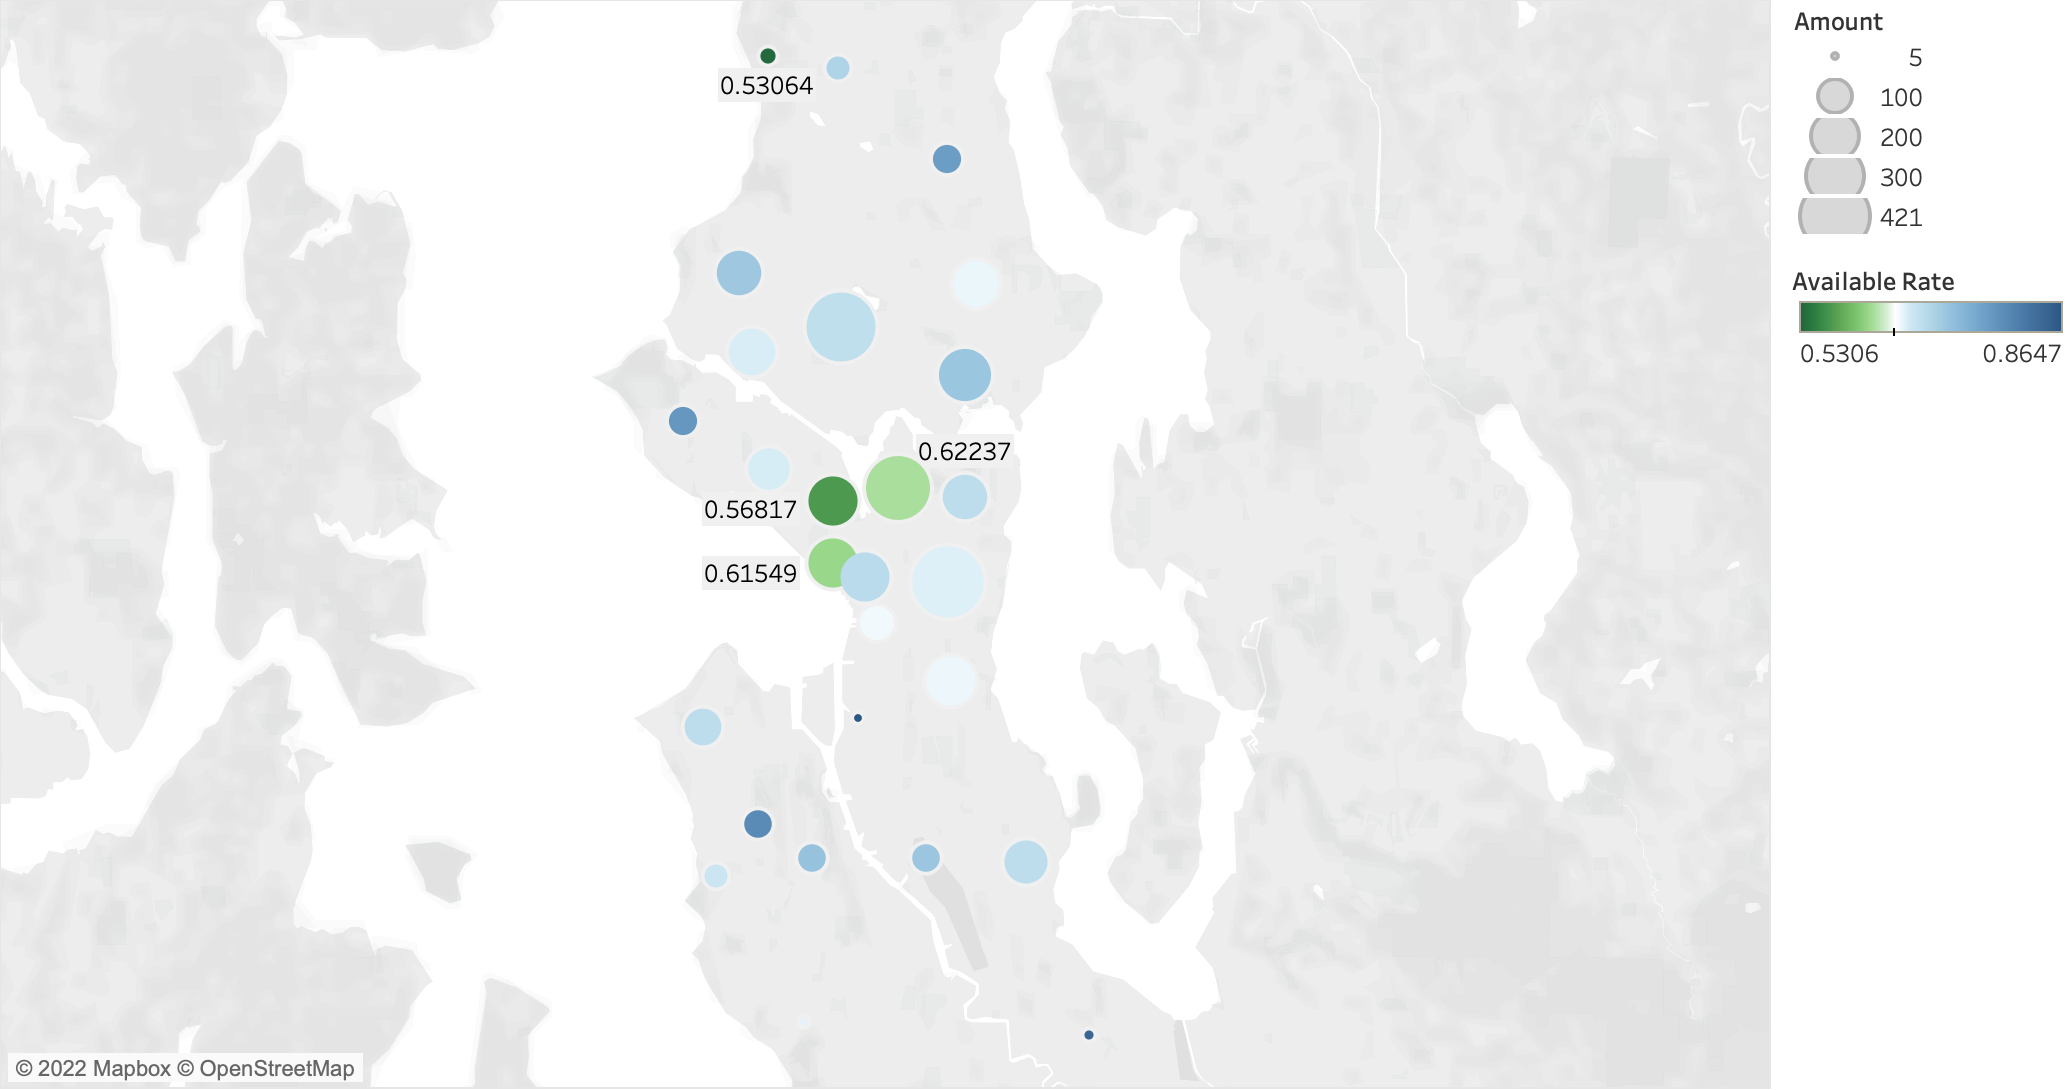

In [32]:
from IPython.display import Image
Image('location distribution vs available rate.png')

**Conclusion**: While size presents the number of lodging and color stands for the available rate, we can see that more lodgings provided don't correlate to a lower available rate (that is, fewer lodgings remain available throughout the year). From the chart we can see, there is an area in northern Seattle where almost half of the time are booked through out the year. 

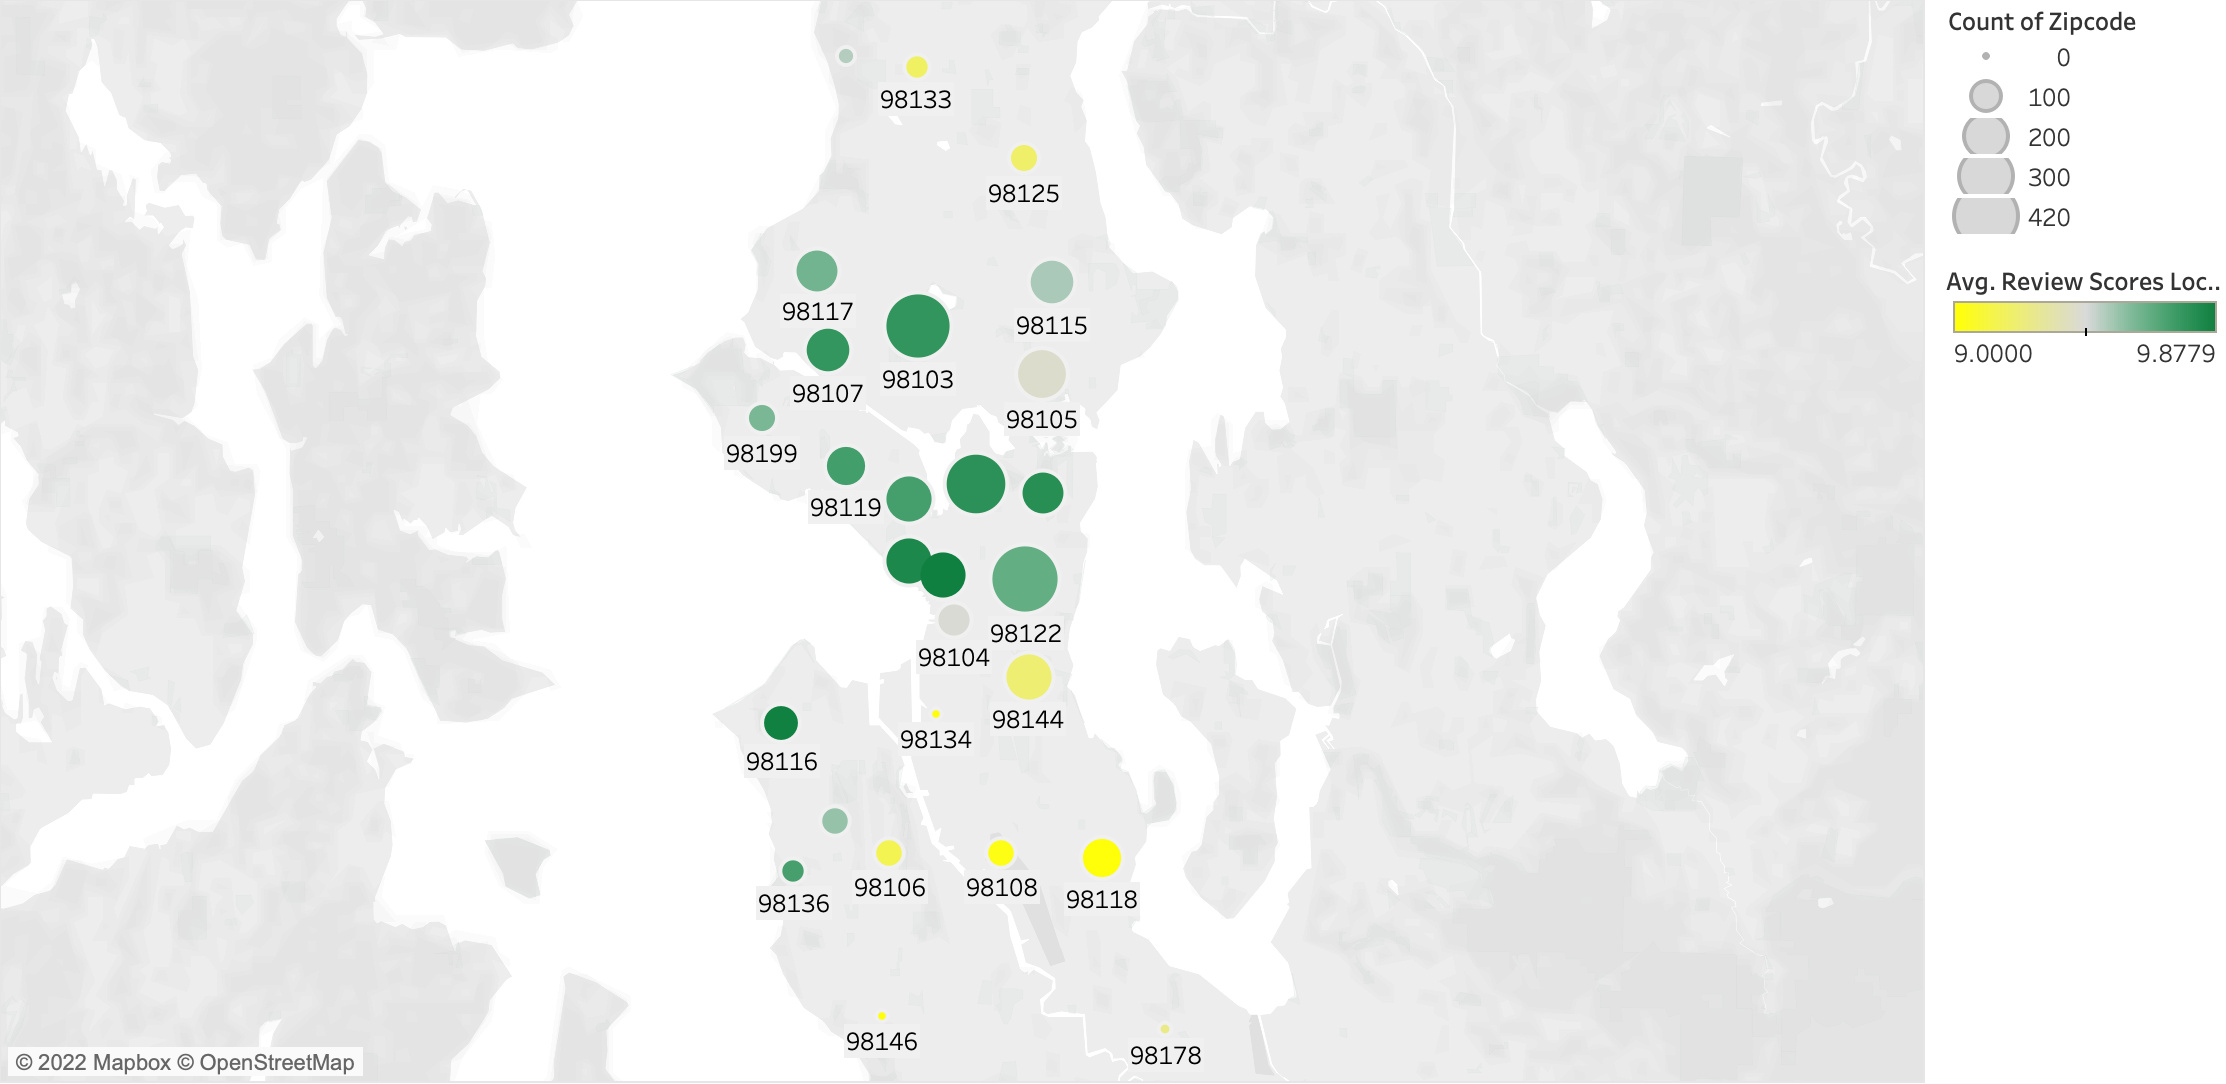

In [34]:
from IPython.display import Image
Image('location distribution vs review score.png')

**Conclusion**: Even though the available rate shows us that lodging in an area with more lodgings does not result in a higher booking rate, the site is still a popular location that travelers like. We can see that most places with more accommodation are in the green zone. 

### Question 2: What does other host have for their lodging
Room size are a significant feature that traveler would consider for staying. Yet how the accomodation looks like is not easy to change. What host can do to improve their travelers experience is by add more amentities, which might also increase the stay price per day. 
* The distribution of room type
* Extracting the amenity list to see what is common in the area in order to see what option can be choose to be a competitive host

In [35]:
#convert the amenities column to list and extract the number of amenities to be a new attribute
listings['amenities'] = listings['amenities'].str.replace('[{"}]', '', regex=True).apply(lambda x: x.split(','))
listings['amenities_counts'] = listings['amenities'].apply(lambda x: len(x))

In [36]:
listings[['bathrooms','bedrooms', 'beds','amenities_counts']].describe()

,bathrooms,bedrooms,beds,amenities_counts
count,3802.000000,3812.000000,3817.000000,3818.000000
mean,1.259469,1.307712,1.735394,14.370613
std,0.590369,0.883395,1.139480,4.706825
min,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,11.000000
50%,1.000000,1.000000,1.000000,14.000000
75%,1.000000,2.000000,2.000000,17.000000
max,8.000000,7.000000,15.000000,30.000000


We can see that all lodgings describe the amenities, yet not all of them have their bathrooms, bedrooms and beds number in the dataset. 

#### Room type

Room type can be measured by room features: bathrooms,bedrooms, beds,amenities_counts

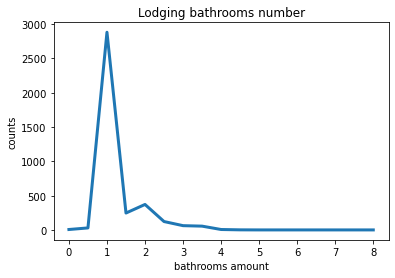

In [37]:
#Bathrooms
feature_bathrooms=listings.bathrooms.value_counts().sort_index()

#Visualization
plt.figure()
x = feature_bathrooms.index
y = feature_bathrooms.values
plt.plot(x,y,linewidth=3.0)
plt.xlabel('bathrooms amount')
plt.ylabel('counts')
plt.title('Lodging bathrooms number')
plt.grid(False)
plt.show()

**Observation**: Most of the accomodation in Seattle only has one bathroom, some of them don't even have any.

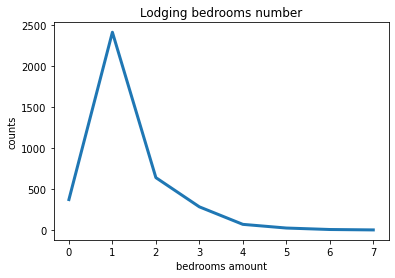

In [38]:
#Bedrooms 
feature_bedrooms=listings.bedrooms.value_counts().sort_index()

#Visualization
plt.figure()
x = feature_bedrooms.index
y = feature_bedrooms.values
plt.plot(x,y,linewidth=3.0)
plt.xlabel('bedrooms amount')
plt.ylabel('counts')
plt.title('Lodging bedrooms number')
plt.grid(False)
plt.show()

**Observation**: Combine with the number of bathrooms, we can see the most common type of accomodation is 1B1B(1 bedroom with 1 bathroom). 

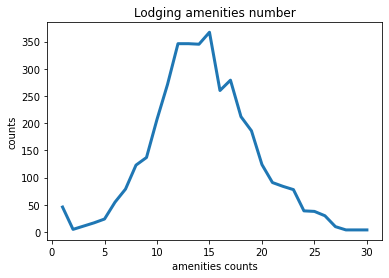

In [39]:
#Amenities_counts
feature_amenities=listings.amenities_counts.value_counts().sort_index()

#Visualization
plt.figure()
x = feature_amenities.index
y = feature_amenities.values
plt.plot(x,y,linewidth=3.0)
plt.xlabel('amenities counts', )
plt.ylabel('counts')
plt.title('Lodging amenities number')
plt.grid(False)
plt.show()

**Observation**: Most of the lodging has 10 to 16 amenities. There are rooms where 30 amenities are provided for travelers. 

#### Amenities Observation
The list of amenities can help host improving their rooms and thus increase the number of booking

In [40]:
amenities = []
for row in listings.amenities:
    amenities = list(set(amenities + row))
amenities.remove('')

In [41]:
amenities#pd.DataFrame(amenities.sort(key = len)).to_excel('amenities.xlsx')

['Wheelchair Accessible',
 'Kitchen',
 'Heating',
 'Dryer',
 'Iron',
 'Fire Extinguisher',
 'Doorman',
 'Hair Dryer',
 'First Aid Kit',
 'Pool',
 'Washer',
 'Dog(s)',
 'TV',
 'Gym',
 'Suitable for Events',
 'Cable TV',
 'Breakfast',
 'Indoor Fireplace',
 '24-Hour Check-in',
 'Elevator in Building',
 'Other pet(s)',
 'Pets Allowed',
 'Free Parking on Premises',
 'Smoke Detector',
 'Hot Tub',
 'Essentials',
 'Wireless Internet',
 'Pets live on this property',
 'Buzzer/Wireless Intercom',
 'Carbon Monoxide Detector',
 'Air Conditioning',
 'Smoking Allowed',
 'Laptop Friendly Workspace',
 'Family/Kid Friendly',
 'Shampoo',
 'Lock on Bedroom Door',
 'Cat(s)',
 'Safety Card',
 'Internet',
 'Hangers',
 'Washer / Dryer']

In [42]:
print('Over all lodgings in the dataset, there are', len(amenities), 'different kinds of amenity')

Over all lodgings in the dataset, there are 41 different kinds of amenity


### Question 3: What features affect lodging price the most?

In [43]:
col_id = listings.columns[listings.columns.str.endswith('id')]
listings.select_dtypes(['int64','float64']).drop(col_binary+list(col_review)+list(col_id),axis = 1).corr()['price'].sort_values(ascending = False)

price                             1.000000
weekly_price                      0.971068
monthly_price                     0.938138
accommodates                      0.652218
bedrooms                          0.627720
beds                              0.589525
cleaning_fee                      0.576423
bathrooms                         0.516424
guests_included                   0.392875
security_deposit                  0.333579
amenities_counts                  0.184176
extra_people                      0.127961
host_total_listings_count         0.093962
host_listings_count               0.093962
minimum_nights                    0.017297
host_acceptance_rate              0.005915
host_response_rate                0.002146
maximum_nights                   -0.003336
latitude                         -0.008904
availability_365                 -0.015550
availability_30                  -0.037653
availability_60                  -0.049336
calculated_host_listings_count   -0.054092
availabilit

In [44]:
listings['price_per_person'] = listings['price']/listings['accommodates']
listings.select_dtypes(['int64','float64']).drop(col_binary+list(col_review)+list(col_id),axis = 1).corr()['price_per_person'].sort_values(ascending = False)

price_per_person                  1.000000
price                             0.450056
weekly_price                      0.421815
monthly_price                     0.415376
security_deposit                  0.061220
availability_365                  0.030469
bathrooms                         0.024170
host_response_rate                0.018060
cleaning_fee                      0.017096
availability_30                   0.013015
availability_60                   0.000509
minimum_nights                    0.000373
availability_90                  -0.002546
host_total_listings_count        -0.002917
host_listings_count              -0.002917
maximum_nights                   -0.003295
host_acceptance_rate             -0.004880
extra_people                     -0.015755
latitude                         -0.018131
calculated_host_listings_count   -0.043426
longitude                        -0.045830
bedrooms                         -0.070053
amenities_counts                 -0.070698
guests_incl

**Conclustion**: The price per night is highly correlated to accommodation, which stands for the number of people who can live in the housing. At the same time, the more expensive the lodging is, the more costly the cleaning fee comes with the booking.

In [48]:
listings.groupby('property_type').agg(price_per_person=('price_per_person','mean'),
                                                count=('id','count')
                                               ).reset_index().sort_values('price_per_person',ascending=False)

,property_type,price_per_person,count
2,Boat,84.682292,8
14,Treehouse,59.666667,3
1,Bed & Breakfast,56.828829,37
10,Loft,50.144167,40
7,Condominium,48.307143,91
6,Chalet,47.875000,2
4,Cabin,43.996032,21
5,Camper/RV,43.820513,13
0,Apartment,43.276326,1708
3,Bungalow,43.050000,13


**Conclusion**:The most common accomodation are Apartment and House, where have similar price per person, while there are special lodging such as Boat and Treehouse which have higher price compare to other types.